In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df=pd.read_csv("C:/Users/deevy/Desktop/Fraud.csv")
df1=pd.read_csv("C:/Users/deevy/Desktop/Fraud.csv")

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### EDA and Data Cleaning

In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
#checking for na values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Text(0, 0.5, 'Data')

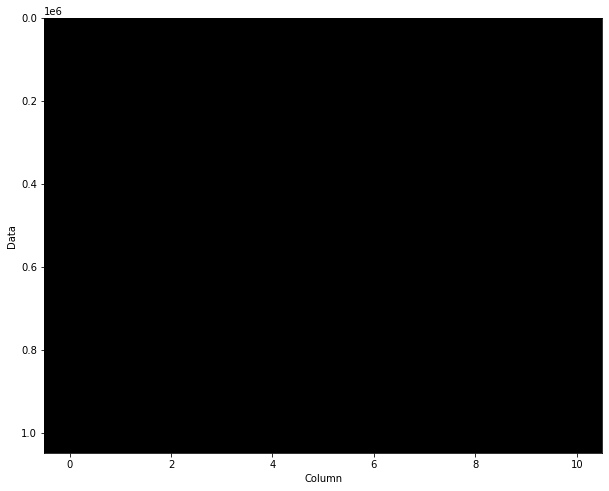

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column")
plt.ylabel("Data")

In [7]:
df.duplicated().sum()

0

In [8]:
#we will be removing outliers only from df1 to check how our models perfrom in both conditions

In [9]:
from scipy import stats
z_scores = stats.zscore(df1['amount'])
# Identify outliers using a threshold value (std. deviation)
threshold = 3
outliersAmount = df1[(z_scores > threshold) | (z_scores < -threshold)]

In [10]:
outliersAmount.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626.01,C926859124,0.0,0.0,C665576141,29031.00,5515763.34,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.0,0.0,C1590550415,2041543.62,19200000.00,0,0
94,1,TRANSFER,1724887.05,C1495608502,0.0,0.0,C1590550415,3470595.10,19200000.00,0,0


In [11]:
#removing outliers using isin which give True and False values and then negating the results using '~'
df1 = df1[~df1['amount'].isin(outliersAmount['amount'])]

In [12]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:>

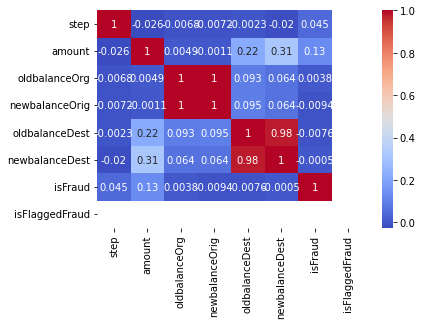

In [13]:
corr_matrix1 = df.corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')

<AxesSubplot:>

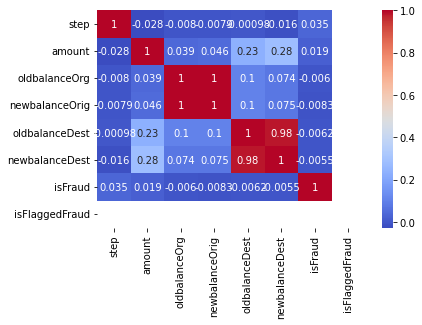

In [14]:
corr_matrix2 = df1.corr()
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')

### MODEL PREPARATION

In [15]:
df['type']=df['type'].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})

In [16]:
df1['type']=df1['type'].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})

In [17]:
df.head(2), df1.head(2)

(   step  type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
 0     1     2  9839.64  C1231006815       170136.0       160296.36   
 1     1     2  1864.28  C1666544295        21249.0        19384.72   
 
       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
 0  M1979787155             0.0             0.0        0               0  
 1  M2044282225             0.0             0.0        0               0  ,
    step  type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
 0     1     2  9839.64  C1231006815       170136.0       160296.36   
 1     1     2  1864.28  C1666544295        21249.0        19384.72   
 
       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
 0  M1979787155             0.0             0.0        0               0  
 1  M2044282225             0.0             0.0        0               0  )

In [18]:
# selecting variables to be included in the model
X=df[['type','amount','oldbalanceOrg', 'newbalanceOrig']]

In [19]:
# selecting the isFraud column from the Dataset
Y=df.iloc[:,-2]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
# training our model on data with ouliers

In [21]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
# checking performance
model1.score(X_test, y_test)

0.9994802470018835

In [23]:
# evaluating the performance of our model for Decision tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model1.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9994802470018835
Precision: 0.7751196172248804
Recall: 0.7232142857142857
F1 score: 0.7482678983833717


In [24]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state=42)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9992465965715376

In [25]:
# evaluating the performance of our model for Logistic Regression using dataset with outliers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model2.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9992465965715376
Precision: 0.8666666666666667
Recall: 0.3482142857142857
F1 score: 0.4968152866242038


In [26]:
# Now using the dataset where outliers have been removed
X1=df1[['type','amount','oldbalanceOrg', 'newbalanceOrig']]

In [27]:
Y1=df1.iloc[:,-2]

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,Y1, test_size=0.2, random_state=42)

In [29]:
model3=DecisionTreeClassifier()
model3.fit(X_train1,y_train1)
model3.score(X_test1, y_test1)

0.9994169974396471

In [30]:
model4 = LogisticRegression(random_state=42)
model4.fit(X_train1, y_train1)
model4.score(X_test1, y_test1)

0.9995578897250658

In [31]:
# for Decision tree
y_pred1 = model3.predict(X_test1)
print('Accuracy:', accuracy_score(y_test1, y_pred1))
print('Precision:', precision_score(y_test1, y_pred1))
print('Recall:', recall_score(y_test1, y_pred1))
print('F1 score:', f1_score(y_test1, y_pred1))

Accuracy: 0.9994169974396471
Precision: 0.6846153846153846
Recall: 0.5297619047619048
F1 score: 0.5973154362416107


In [32]:
# for logistic regression
y_pred11 = model4.predict(X_test1)
print('Accuracy:', accuracy_score(y_test1, y_pred11))
print('Precision:', precision_score(y_test1, y_pred11))
print('Recall:', recall_score(y_test1, y_pred11))
print('F1 score:', f1_score(y_test1, y_pred11))

Accuracy: 0.9995578897250658
Precision: 0.9230769230769231
Recall: 0.5
F1 score: 0.6486486486486487


In [34]:
model1.predict([[2,9839.64,170136.0,160296.36]])

C:\Users\deevy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [35]:
model1.predict([[4,181.00,181.0,0]])

C:\Users\deevy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)